<a href="https://colab.research.google.com/github/jammy-bot/keras-simple-covnet/blob/master/keras_simple_covnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Build a Neural Network for the MNIST image classification dataset, with a hidden Convolutional layer, a hidden Dense layer, and Dropout layers.

In [1]:
# importing required libraries
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np

# batching data for training
batch_size = 128
num_classes = 10
epochs = 12

# inputting image dimensions
img_rows, img_cols = 28, 28

# splitting the data between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [2]:
# import visualization library
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# np.random(rand_int(len(y_train)))

np.random.randint(len(y_train))

31925

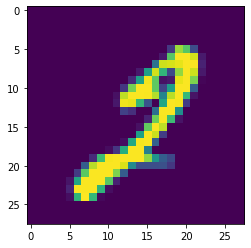

Label for the element 8853 : 2


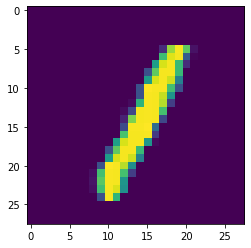

Label for the element 24555 : 1


In [4]:
# displaying a random element from the training set and its label
element = np.random.randint(len(y_train))
plt.imshow(x_train[element])
plt.show()
print("Label for the element", element,":", y_train[element])

# displaying a random element from the training set and its label
element = np.random.randint(len(y_train))
plt.imshow(x_train[element])
plt.show()
print("Label for the element", element,":", y_train[element])

## Prepare Training Data

Reshape for training on GPU

In [5]:
## reshaping (conditionally)
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)


Normalize data and convert for use with categorical_crossentropy

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# converting class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Build the Network

Define the Network Architecture and Compile the Model

In [7]:
# building the network
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [8]:
# printing a summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

Fit the Model

In [9]:
# train and validate the model
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 5s 81us/step - loss: 0.2654 - accuracy: 0.9174 - val_loss: 0.0591 - val_accuracy: 0.9807
Epoch 2/12
60000/60000 [==============================] - 3s 55us/step - loss: 0.0897 - accuracy: 0.9734 - val_loss: 0.0457 - val_accuracy: 0.9857
Epoch 3/12
60000/60000 [==============================] - 3s 55us/step - loss: 0.0667 - accuracy: 0.9798 - val_loss: 0.0350 - val_accuracy: 0.9885
Epoch 4/12
60000/60000 [==============================] - 3s 55us/step - loss: 0.0531 - accuracy: 0.9844 - val_loss: 0.0329 - val_accuracy: 0.9892
Epoch 5/12
60000/60000 [==============================] - 3s 55us/step - loss: 0.0447 - accuracy: 0.9861 - val_loss: 0.0286 - val_accuracy: 0.9901
Epoch 6/12
60000/60000 [==============================] - 3s 54us/step - loss: 0.0408 - accuracy: 0.9878 - val_loss: 0.0265 - val_accuracy: 0.9915
Epoch 7/12
60000/60000 [==============================] - 3s 54us/st

Check Model Loss and Accuracy Scores

In [10]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0282563278433327
Test accuracy: 0.9904999732971191


## Results

Model achieves an accuracy of 99.21\% on the test set, with a loss of 2.60\%.

In [11]:
predictions = model.predict(x_test[0:100])

predictions[0]



array([1.1011269e-12, 2.2215740e-11, 6.5773810e-11, 9.4580188e-10,
       2.7317709e-14, 3.9572969e-14, 2.0455510e-16, 1.0000000e+00,
       4.1085405e-13, 8.2406838e-11], dtype=float32)

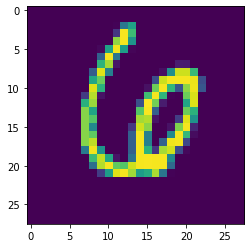

Label for the element 66 : [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Prediction for the element: 6


In [12]:
# show the image for element 50
element =  np.random.randint(len(predictions))
plt.imshow(x_test[element].reshape(28,28))
plt.show()

# show the mode's prediction for a random element from the test set
print("Label for the element", element,":", y_test[element])
print("Prediction for the element:", np.argmax(predictions[element]))